# Encoding via Size

**Point size is a good encoding for numeric variables**. Usually, we want the numeric values to be proportional to the area of the point markers; this is the default functionality of the "s" parameter in scatter.

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
sedan_classes = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df.VClass = df.VClass.astype(vclasses)
df['trans_type'] = df.trans.apply(lambda x: x.split()[0])
df.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


We will create a scatter plot of fuel mileage against engine size. I will take a random subset of 200 cars to reduce over-plotting and combine that with a small amount of horizontal jitter.

We wanted to add carbon dioxide emissions as a third variable?
Since CO2 is numeric,One encoding we could use is marker size. 

In [2]:
sample = np.random.choice(df.shape[0], 200, replace = False)
subset_df = df.loc[sample]

You need to refer to "s" through a dictionary assigned to the "scatter_kws" parameter when working with regplot.

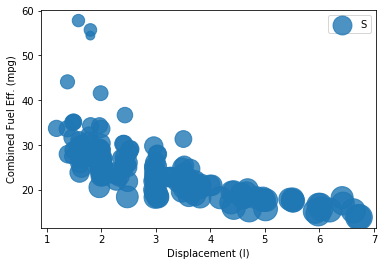

In [11]:
sb.regplot(data=subset_df, x = 'displ', y = 'comb',
          x_jitter = 0.04, fit_reg = False,
          scatter_kws = {'s':subset_df['co2']})

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend('Size?')


* It looks like as engine size increases,there is a higher level of CO2 emissions. 
    
* It also seems that the less fuel efficient cars also tend to have higher emissions,even at similar engine sizes. 

While the creation of the plot is easier with size, we need to put in extra leg work to create a legend. Since, as noted above, **legend** will only create one legend entry per plot function call, we need to create additional dummy **scatter** objects with reference sizes to create the plot. The color is fixed so that all of the legend entries have the same color, and two arguments are provided to the legend function: the list of plotting objects to depict in the legend, and their labels.

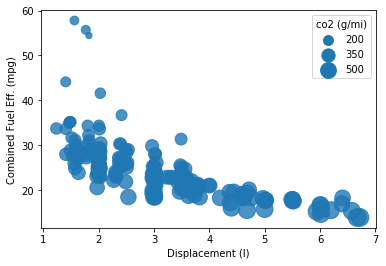

In [12]:
sb.regplot(data=subset_df, x = 'displ', y = 'comb',
          x_jitter = 0.04, fit_reg = False,
          scatter_kws = {'s':subset_df['co2']/2})

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');


sizes = [200,350,500]
base_color = sb.color_palette()[0] 
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s/2,color=base_color))
plt.legend(legend_obj, sizes, title = 'co2 (g/mi)')

In the case of the example, the data was also scaled in a way that the marker sizes made sense as given. You might need to apply a scaling factor (e.g., multiplying or dividing all values by 2) or shift in order to make the size encoding interpretable. In particular, if the values in your third numeric variable include negative values, then you might want to choose a color encoding instead.

## A Warning on Combining Encodings

It might seem plausible to combine both size and shape encodings into the same plot, to depict the trend in four variables at once. Technically, this may be true, but there are some cautions to be taken with this approach. One surface issue is that the code to depict the plot and a reasonable legend gets complicated. A more important issue is that point areas won't all be the same even with the same value, depending on the shape of the marker:


([], <a list of 0 Text yticklabel objects>)

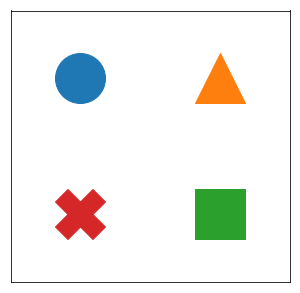

In [14]:
plt.figure(figsize = [5,5])
common_size = 2500
plt.scatter([0],[1], marker = 'o', s = common_size)
plt.scatter([1],[1], marker = '^', s = common_size)
plt.scatter([1],[0], marker = 's', s = common_size)
plt.scatter([0],[0], marker = 'X', s = common_size)

# a little bit of aesthetic cleaning
plt.xlim(-.5, 1.5)
plt.xticks([])
plt.ylim(-.5,1.5)
plt.yticks([])

Despite having the same "s" values, the triangle, circle, and X markers all look smaller (have a smaller area) than the square. Perhaps this isn't a major concern, considering that size is better used as a qualitative measure for exploration. But it's still something to consider. A little more discussion of the number of variables that can be reasonably packed into a plot can be found later in the section ("How much is too much?").